In [11]:
# Установка и импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [12]:
# Загрузка данных
train_df = pd.read_csv('/content/fmnist_train.csv')
test_df = pd.read_csv('/content/fmnist_test.csv')
sample_submission = pd.read_csv('/content/sample_submission.csv')

Train shape: (17040, 786)
Test shape: (10000, 785)
Пропущенных значений в train: 424
Пропущенных значений в test: 0


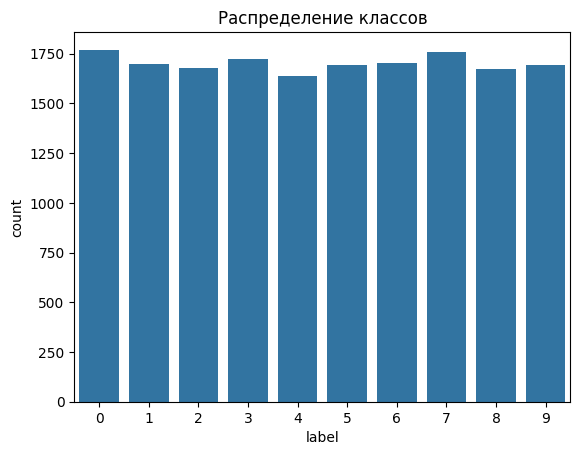

In [13]:
# Анализ данных
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("Пропущенных значений в train:", train_df.isna().sum().sum())
print("Пропущенных значений в test:", test_df.isna().sum().sum())

sns.countplot(x='label', data=train_df)
plt.title("Распределение классов")
plt.show()


In [14]:
train_df.fillna(0.0, inplace=True)

In [15]:
# Подготовка данных для модели

# Отделим признаки и целевую переменную
X = train_df.drop(['label', 'Id'], axis=1).values
y = train_df['label'].values

# Преобразуем тест
X_test = test_df.drop(['Id'], axis=1).values
test_ids = test_df['Id']

# Нормализация
X = X / 255.0
X_test = X_test / 255.0

# Преобразуем в 28x28 изображения с 1 каналом
X = X.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encoding
y_cat = to_categorical(y, num_classes=10)


In [16]:
# Разделение train/validation
X_train, X_val, y_train, y_val = train_test_split(X, y_cat, test_size=0.2, random_state=42, stratify=y)

In [17]:
# Создание модели CNN

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Обучение модели
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=10,
                    batch_size=64)


Epoch 1/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6135 - loss: 1.1471 - val_accuracy: 0.8104 - val_loss: 0.5144
Epoch 2/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8025 - loss: 0.5248 - val_accuracy: 0.8486 - val_loss: 0.4292
Epoch 3/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8321 - loss: 0.4503 - val_accuracy: 0.8592 - val_loss: 0.3991
Epoch 4/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8412 - loss: 0.4097 - val_accuracy: 0.8688 - val_loss: 0.3769
Epoch 5/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8586 - loss: 0.3885 - val_accuracy: 0.8653 - val_loss: 0.3744
Epoch 6/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8763 - loss: 0.3456 - val_accuracy: 0.8797 - val_loss: 0.3452
Epoch 7/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8800 - loss: 0.3270 - val_accuracy: 0.8791 - val_loss: 0.3402
Epoch 8/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8905 - loss: 0.3002 - val_accuracy: 0.

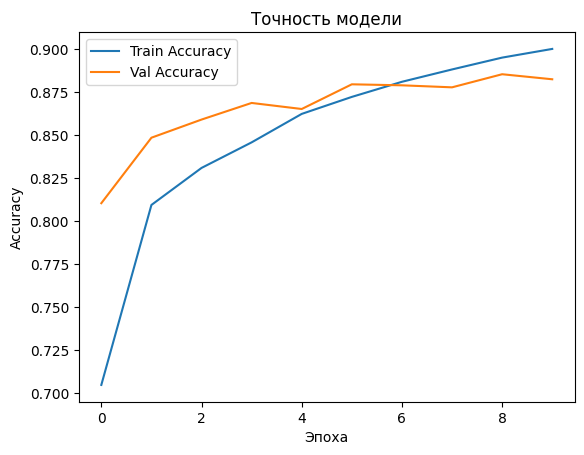

In [19]:
# Визуализация обучения
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Точность модели")
plt.xlabel("Эпоха")
plt.ylabel("Accuracy")
plt.show()


In [20]:
# Предсказания на тестовой выборке
preds = model.predict(X_test)
labels = np.argmax(preds, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [21]:
# Формирование submission.csv
submission = sample_submission.copy()
submission['label'] = labels
submission.to_csv('submission.csv', index=False)
print("Файл submission.csv успешно сохранен.")

Файл submission.csv успешно сохранен.
